In [163]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [29]:
shape_file = gpd.read_file('../data/map/plz-5stellig.shp/plz-5stellig.shp')
water_file = gpd.read_file('../data/map/germany-waterways-shape/waterways.shp')


In [65]:
basin_file = gpd.read_file('../data/map/hybas_eu_lev01-12_v1c/hybas_eu_lev12_v1c.shp')


In [145]:
basin_file_org = basin_file.assign(basinclass = lambda x: round(x['PFAF_ID']/100))


In [146]:
basin_file_test = basin_file_org[(basin_file_org['basinclass']>=2326600000) & (basin_file_org['basinclass']<=2326701201)]
basin_file_test = basin_file_test.assign(basinname='Neckar Basin')

<Axes: >

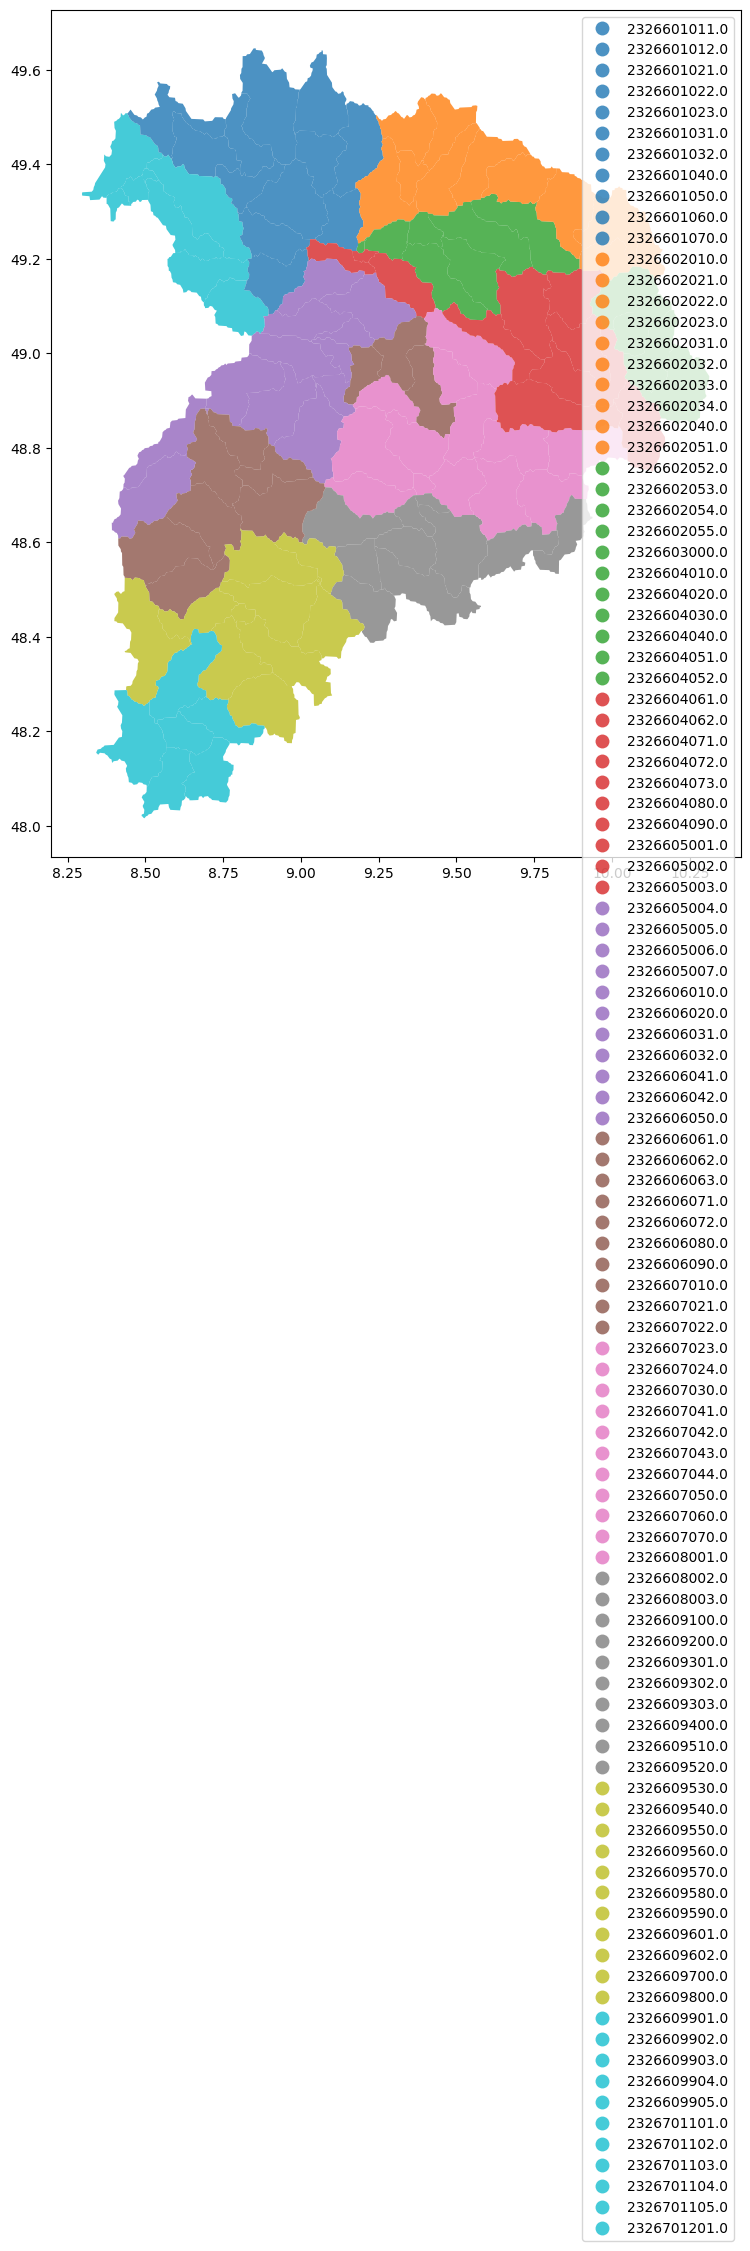

In [151]:
fig, ax = plt.subplots()
basin_file_test.plot(
    ax=ax,
    column='basinclass',
    categorical=True,
    legend=True,
    cmap='tab10',
    alpha=0.8
)

In [148]:
plt.rcParams['figure.figsize'] = [16, 11]
shape_file = shape_file.assign(first_dig_plz = lambda x: x['plz'].str.slice(start=0, stop=1))
badenwuerttemberg = shape_file[shape_file['first_dig_plz']=='7']
badenwuerttemberg = badenwuerttemberg.assign(name = 'Baden-Wuerttemberg')
neckar = water_file[water_file['name']=='Neckar']
cannstatt = badenwuerttemberg[badenwuerttemberg['plz']=='70372']
esslingen = badenwuerttemberg[badenwuerttemberg['plz']=='73730']

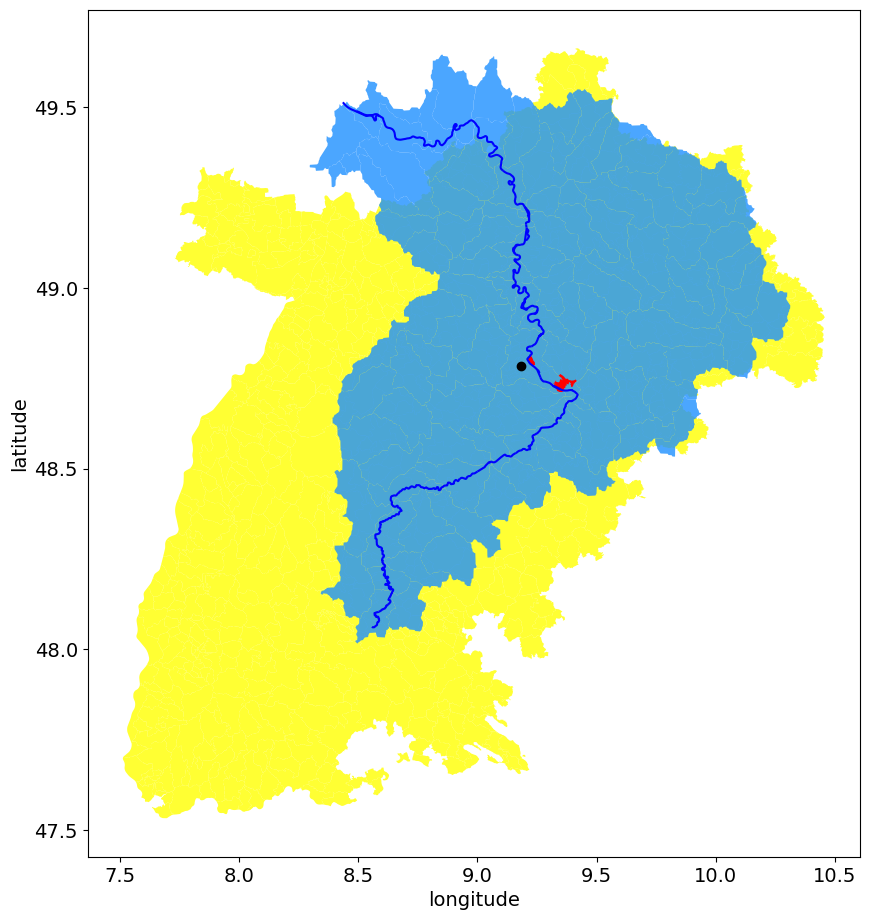

In [176]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots()
badenwuerttemberg.plot(
    ax=ax,
    #column='name',
    #categorical=True,
    #legend=True,
    #cmap='Pastel1',
    color='yellow',
    alpha=0.8
)
basin_file_test.plot(
    ax=ax,
    #column='basinname',
    #categorical=True,
    #legend=True,
    #cmap='tab10',
    color='dodgerblue',
    alpha=0.8
)

neckar.plot(ax=ax,color='blue')
cannstatt.plot(ax=ax,color='red')
esslingen.plot(ax=ax,color='red')
ax.scatter(9.183333,48.783333,color='black')
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
fig.savefig('../../write/bilder/kapitel2/neckarbasinareainbw.png',bbox_inches='tight')